In [6]:
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data.paths.parquet_paths import TIP

In [7]:
tip_df = pd.read_parquet(str(TIP))
tip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   text              100000 non-null  object
 1   date              100000 non-null  object
 2   compliment_count  100000 non-null  int32 
 3   business_id       100000 non-null  object
 4   user_id           100000 non-null  object
dtypes: int32(1), object(4)
memory usage: 3.4+ MB


### Variables - helpers

In [8]:
user_id = 'user_id'
business_id = 'business_id'
text = 'text'
date = 'date'
compliment_count = 'compliment_count'

In [17]:
tip_df.sample(1)

,text,date,compliment_count,business_id,user_id
41106,"If you are looking to get an ombré, definitely...",2016-03-05 01:29:34,0,3jJ836RF3OBFly_Ry9xojQ,34v-F0IrcSD8XPniAzSXdQ
18290,this place is closed!,2014-02-08 00:49:57,0,VQL8cwZpQyxsEcMCPw950Q,msbNF-OYhHH6FJ_oQy1-cA


In [18]:
tip_df['text_len'] = tip_df['text'].apply(len)

In [20]:
tip_df['text_len'].describe()

count    100000.000000
mean         61.299770
std          55.314072
min           1.000000
25%          27.000000
50%          47.000000
75%          77.000000
max         500.000000
Name: text_len, dtype: float64

In [22]:
tip_df.loc[tip_df['text_len'] == 500].sample(5)

,text,date,compliment_count,business_id,user_id,text_len
59660,The customer service here it's like 40%. they ...,2013-12-02 01:15:26,0,anhk98859Rmo3mL6X41jbg,AahLoKVDwiv7fKH5iICxtw,500
82037,Horrible pedicure and service experience! $45 ...,2013-06-07 17:24:22,0,Q9nbGK5msNEaxmcpsNmogA,CjdYuqiL8WjW39fsUt2tRA,500
10689,These jerks tinted one of my cars and paid whe...,2013-10-09 19:18:06,0,RSUDauY2m-H-eZDoW6WIHg,TeEt3ck4ZZlzwKglH21Nzw,500
80167,"Great place to stay for families, had read som...",2016-08-18 00:22:56,0,GXgRphD4T0NQ4n88rdVyEw,ITrAwq34rhgnBl3NVyS68w,500
76587,My best friend took my boyfriend and I there l...,2013-12-19 07:32:42,0,_YUcCnJXjUgkS9fSnNi0Ow,nnivZ9f-24NEInWK2D5W9w,500


compliment_count
0    98466
1     1407
2      107
3       16
4        3
5        1
Name: compliment_count, dtype: int64


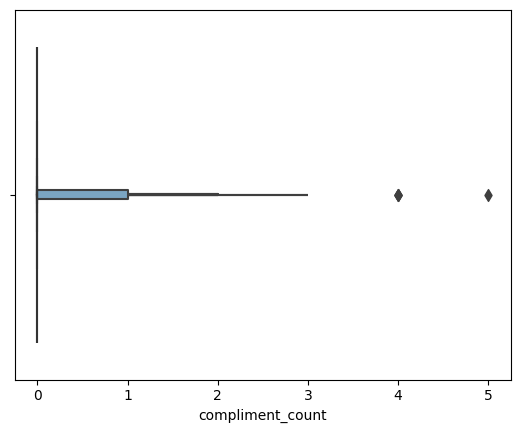

In [16]:
print(tip_df.groupby(compliment_count)[compliment_count].count())
sns.boxenplot(data=tip_df, x=compliment_count)
plt.show()